In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df=df.drop(columns='B',axis=1)
df=df.drop(columns='ZN',axis=1)
df.head()


,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


In [7]:
df['CRIM']=np.log1p(df['CRIM'])
df['AGE']=np.sqrt(df['AGE'])

<Axes: xlabel='CRIM', ylabel='Count'>

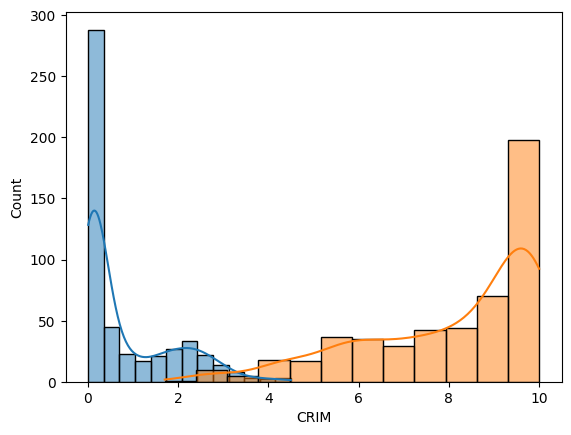

In [8]:
#after transform visualization
sns.histplot(df['CRIM'],kde=True)
sns.histplot(df['AGE'],kde=True)

In [9]:
df['CRIM'].describe()

count    506.000000
mean       0.813418
std        1.022731
min        0.006300
25%        0.078853
50%        0.228336
75%        1.542674
max        4.499545
Name: CRIM, dtype: float64

In [10]:
from scipy.stats import boxcox
df['CRIM_trans'],_=boxcox(df['CRIM']+1)

In [11]:
df[['CRIM','CRIM_trans']].describe()

,CRIM,CRIM_trans
count,506.000000,506.000000
mean,0.813418,0.258823
std,1.022731,0.207326
min,0.006300,0.006251
25%,0.078853,0.071722
50%,0.228336,0.176863
75%,1.542674,0.501217
max,4.499545,0.613161


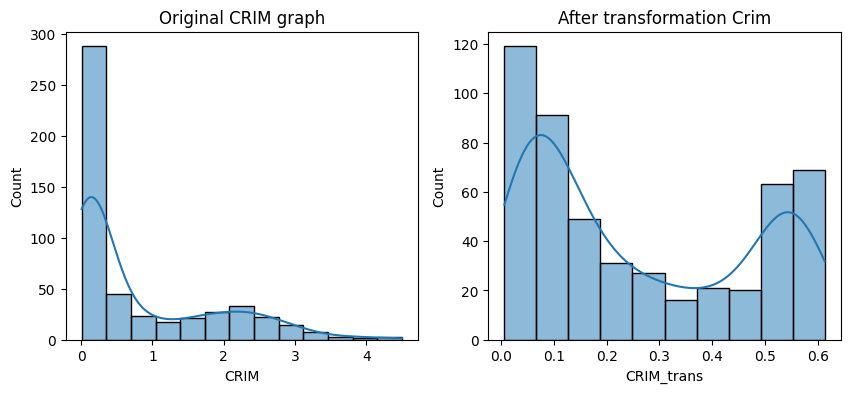

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['CRIM'],kde=True)
plt.title("Original CRIM graph")
plt.subplot(1,2,2)
sns.histplot(df['CRIM_trans'],kde=True)
plt.title("After transformation Crim")
plt.show()

In [13]:
df=df.drop(columns=['CRIM'])

In [14]:
print(df.columns)

Index(['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT', 'MEDV', 'CRIM_trans'],
      dtype='object')


In [15]:
#outlier treatment 
cat_cols=[ 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT', 'MEDV']
def outliers_treatment(dataset,columns):
    for col in columns:
        Q1=dataset[col].quantile(0.25)
        Q2=dataset[col].quantile(0.75)
        IQR=Q2-Q1
        lower_bound=Q1- 1.5*IQR
        upper_bound=Q2- 1.5*IQR
        #cap the outliers
        dataset[col]=dataset[col].apply(lambda x:upper_bound if x>upper_bound else (lower_bound if x < lower_bound else x))
        return dataset
#apply the function
df=outliers_treatment(df,cat_cols)    




In [16]:
df.describe(include='all')

,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CRIM_trans
count,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.136779,0.0,0.554695,6.284634,8.044595,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.258823
std,6.860353,0.0,0.115878,0.702617,1.966478,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.207326
min,0.460000,0.0,0.385000,3.561000,1.702939,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.006251
25%,5.190000,0.0,0.449000,5.885500,6.710066,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.071722
50%,9.690000,0.0,0.538000,6.208500,8.803401,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.176863
75%,18.100000,0.0,0.624000,6.623500,9.699227,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.501217
max,27.740000,0.0,0.871000,8.780000,10.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,0.613161


In [17]:
print(df['INDUS'].unique())  # Should not be a single value!

[ 2.31  7.07  2.18  7.87  8.14  5.96  2.95  6.91  5.64  4.    1.22  0.74
  1.32  5.13  1.38  3.37  6.07 10.81 12.83  4.86  4.49  3.41 15.04  2.89
  8.56 10.01 25.65 21.89 19.58  4.05  2.46  3.44  2.93  0.46  1.52  1.47
  2.03  2.68 10.59 13.89  6.2   4.93  5.86  3.64  3.75  3.97  6.96  6.41
  3.33  1.21  2.97  2.25  1.76  5.32  4.95 13.92  2.24  6.09  9.9   7.38
  3.24  6.06  5.19  1.89  3.78  4.39  4.15  2.01  1.25  1.69  2.02  1.91
 18.1  27.74  9.69 11.93]


<Axes: >

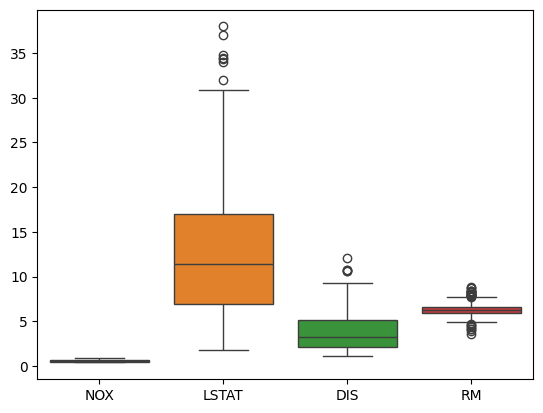

In [18]:

sns.boxplot(data=df[['NOX', 'LSTAT', 'DIS', 'RM']])

<Axes: >

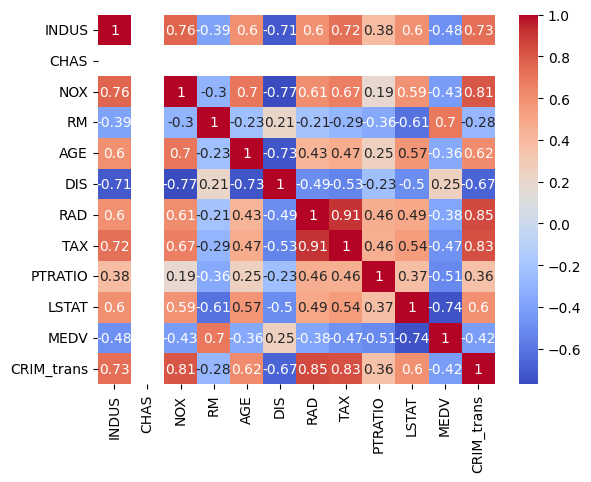

In [19]:
#Exploratory Data Analysis
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<Axes: xlabel='MEDV', ylabel='Count'>

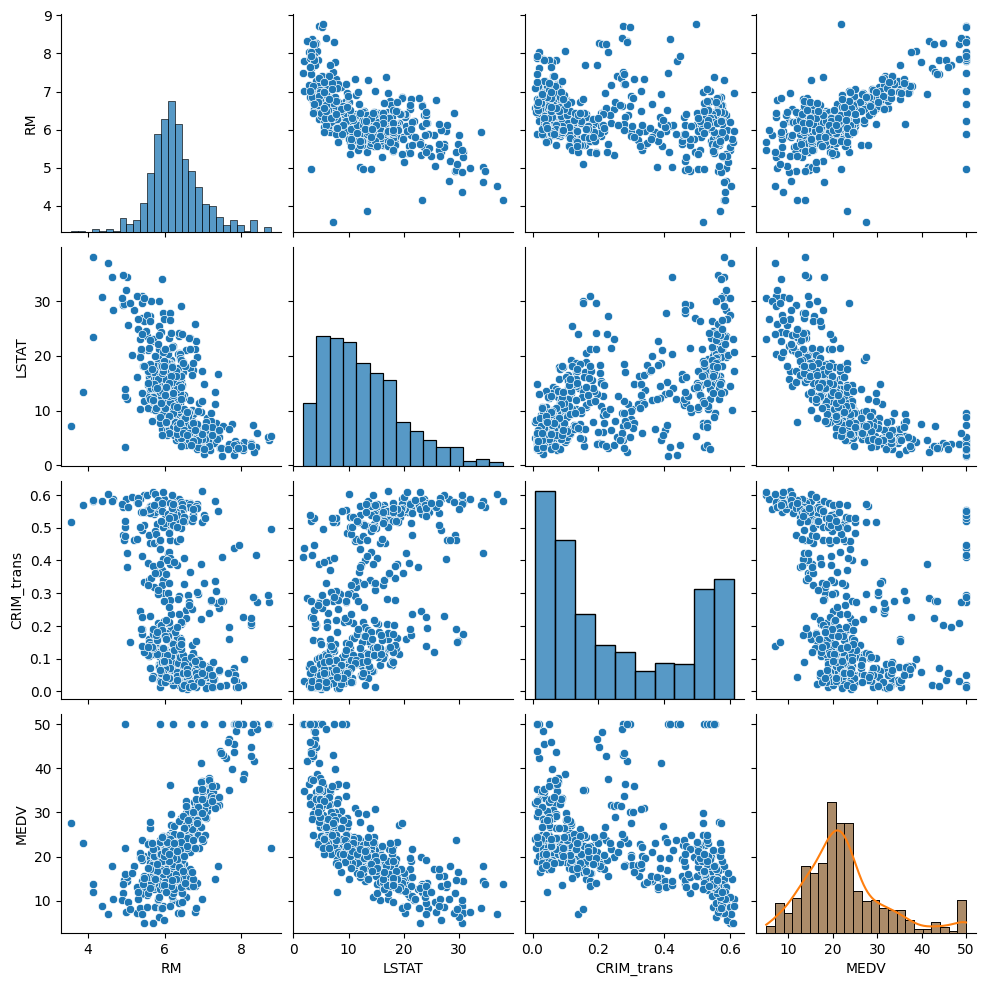

In [20]:
sns.pairplot(df[['RM','LSTAT','CRIM_trans','MEDV']])
sns.histplot(df['MEDV'],kde=True)

In [21]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.mean())  # Fill as above

In [22]:
print("NaN after fix:", df.isna().sum().sum())
print("Inf after fix:", np.isinf(df.select_dtypes(include=np.number)).sum().sum())

NaN after fix: 0
Inf after fix: 0


In [23]:
df=df.drop(columns='INDUS',axis=1)

In [24]:
df=df.drop(columns='RAD',axis=1)

In [25]:
target = df.pop('MEDV')  # Removes and stores the column
df['MEDV'] = target      # Adds it back at the end

In [26]:
df.head()

,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,CRIM_trans,MEDV
0,0.0,0.538,6.575,8.074652,4.0900,296.0,15.3,4.98,0.006251,24.0
1,0.0,0.469,6.421,8.882567,4.9671,242.0,17.8,9.14,0.026062,21.6
2,0.0,0.469,7.185,7.816649,4.9671,242.0,17.8,4.03,0.026044,34.7
3,0.0,0.458,6.998,6.767570,6.0622,222.0,18.7,2.94,0.030631,33.4
4,0.0,0.458,7.147,7.362065,6.0622,222.0,18.7,5.33,0.061590,36.2


In [27]:
x=df.iloc[:,0:9]
y=df['MEDV']


In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
print("Features scaled successfully")

Features scaled successfully


In [48]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(sc_x,y,test_size=0.2,random_state=42)


In [49]:
from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
y_predict=lrmodel.predict(xtest)



In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,make_scorer
mae_lr = mean_absolute_error(ytest, y_predict)
mse_lr = mean_squared_error(ytest, y_predict)
r2_lr = r2_score(ytest, y_predict)

print("Linear Regression Evaluation:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"R-squared: {r2_lr}")

Linear Regression Evaluation:
MAE: 3.207377693282165
MSE: 24.594962735654207
R-squared: 0.6646162017595016


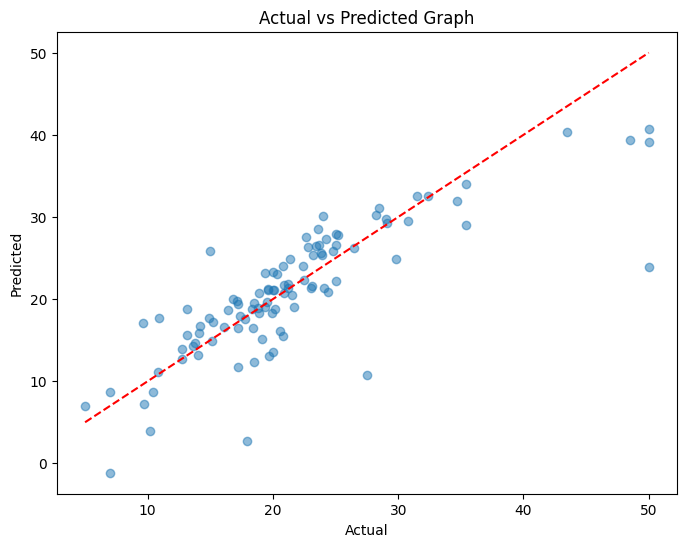

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(ytest,y_predict,alpha=0.5)
plt.plot([min(ytest),max(ytest)],[min(ytest),max(ytest)],color="red",linestyle="--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Graph")
plt.show()

In [63]:
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': 'neg_mean_squared_error',
    'R2': 'r2'
}

In [64]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
lasso = Lasso()
parameters = {'alpha': np.logspace(-4, 0, 20)}  # Smaller range for Lasso

lasso_search = RandomizedSearchCV(lasso, parameters, 
                                 n_iter=15,
                                 cv=5,
                                 scoring=scoring,
                                 refit='MSE',
                                 random_state=42)
lasso_search.fit(xtrain, ytrain)

# See which features were selected (non-zero coefficients)
print("Features kept:", sum(lasso_search.best_estimator_.coef_ != 0))

Features kept: 8


In [65]:
las_predic=lasso_search.predict(xtest)

In [66]:
las_mae=mean_absolute_error(ytest,las_predic)
las_mse=mean_squared_error(ytest,las_predic)
r2_lr = r2_score(ytest, y_predict)

print("Linear Regression Evaluation:")
print(f"MAE: {mae_lr}")
print(f"MSE: {mse_lr}")
print(f"R-squared: {r2_lr}")


Linear Regression Evaluation:
MAE: 3.207377693282165
MSE: 24.594962735654207
R-squared: 0.6646162017595016


In [67]:
Ridge=Ridge()
Ridge.fit(xtrain,ytrain)
rid_pred=Ridge.predict(xtest)
r2_rid=r2_score(ytest,rid_pred)
print(f'R-Squared:{r2_rid}')

R-Squared:0.6645372689084261


In [80]:
from xgboost import XGBRegressor
xgb=XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
xgb.fit(xtrain,ytrain)
xg_pred=xgb.predict(xtest)
mae_xgb=mean_absolute_error(ytest,xg_pred)
r2_xgb=r2_score(ytest,xg_pred)
mse_xg=mean_squared_error(ytest,xg_pred)
print(r2_xgb,mae_xgb,mse_xg)

0.9232407569665912 1.8209851910086239 5.62904568416253


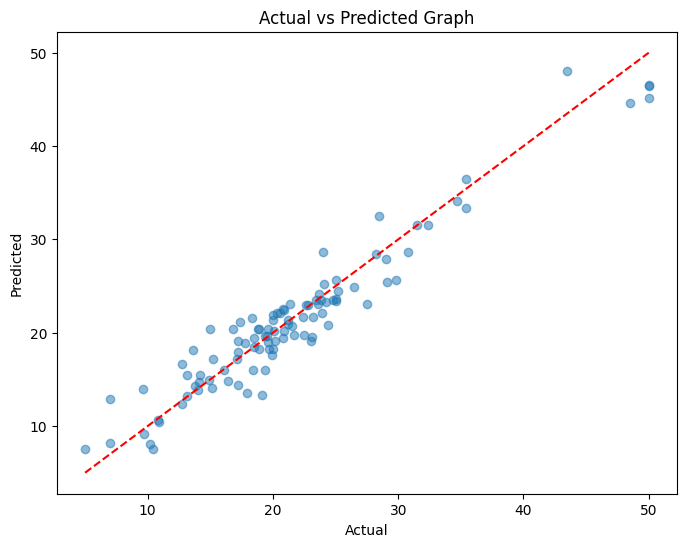

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(ytest,xg_pred,alpha=0.5)
plt.plot([min(ytest),max(ytest)],[min(ytest),max(ytest)],color="red",linestyle="--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Graph")
plt.show()

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_leaf=2,
    random_state=42
)
rf.fit(xtrain, ytrain)
rf_pred=rf.predict(xtest)
mae_rf=mean_absolute_error(ytest,rf_pred)
r2_rf=r2_score(ytest,rf_pred)
mse_rf=mean_squared_error(ytest,rf_pred)
print(r2_rf,mae_rf,mse_rf)

0.8704551073623852 2.0374773011982574 9.50001706621416


In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=10, epsilon=0.1)
svr.fit(xtrain, ytrain)
sv_pred=svr.predict(xtest)
mae_sv=mean_absolute_error(ytest,sv_pred)
r2_sv=r2_score(ytest,sv_pred)
mse_sv=mean_squared_error(ytest,sv_pred)
print(r2_sv,mae_sv,mse_sv)

0.834887237535143 1.9372808123588987 12.108343519599734


In [85]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

estimators = [
    ('xgb', XGBRegressor()),
    ('rf', RandomForestRegressor())
]

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV()
)
stack.fit(xtrain, ytrain)

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                              ('rf', RandomForestRegressor())],
                  final_estimator=RidgeCV())

In [87]:
st=stack.predict(xtest)
r2_st=r2_score(ytest,st)
print(stack.score(xtest,ytest))


0.9013199273138676
